In [52]:
import matplotlib.pylab as plt

from data_scraper.load_data import load_data
from datetime import datetime

In [11]:
# Load data, print length and keys
all_data = load_data('data/lesswrong_2022-06-03_T11H07M')
print(len(all_data))
print(all_data[0].keys())

29518
dict_keys(['createdAt', 'postedAt', 'modifiedAt', 'url', 'title', 'slug', 'viewCount', 'lastCommentedAt', 'clickCount', 'deletedDraft', 'status', 'isFuture', 'sticky', 'stickyPriority', 'userIP', 'userAgent', 'referrer', 'author', 'user', 'userId', 'domain', 'pageUrl', 'pageUrlRelative', 'linkUrl', 'postedAtFormatted', 'emailShareUrl', 'twitterShareUrl', 'facebookShareUrl', 'socialPreviewImageUrl', 'question', 'authorIsUnreviewed', 'wordCount', 'htmlBody', 'submitToFrontpage', 'hiddenRelatedQuestion', 'originalPostRelationSourceId', 'shortform', 'canonicalSource', 'nominationCount2018', 'nominationCount2019', 'reviewCount2018', 'reviewCount2019', 'reviewCount', 'reviewVoteCount', 'positiveReviewVoteCount', 'reviewVoteScoreAF', 'reviewVotesAF', 'reviewVoteScoreHighKarma', 'reviewVotesHighKarma', 'reviewVoteScoreAllKarma', 'reviewVotesAllKarma', 'finalReviewVoteScoreHighKarma', 'finalReviewVotesHighKarma', 'finalReviewVoteScoreAllKarma', 'finalReviewVotesAllKarma', 'finalReviewVote

In [31]:
# View sample of data
posted_dates = [x['postedAt'] for x in all_data]
base_scores = [x['baseScore'] for x in all_data]
print(list(zip(posted_dates[:5], base_scores[:5])))

[('2012-09-26T02:30:53.785Z', 6), ('2012-09-26T03:53:48.227Z', 6), ('2012-09-26T12:25:48.899Z', 55), ('2012-09-26T16:55:32.611Z', 100), ('2012-09-26T23:46:39.597Z', 12)]


In [42]:
# Convert datetime strings to datetime.datetime objects
posted_date_obj = [datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ") for x in posted_dates]
print(posted_date_obj[4])

2012-09-26 23:46:39.597000


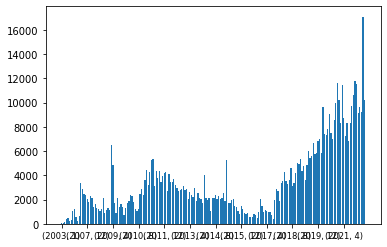

In [82]:
# Compute total karma by month of posts
encode_month = lambda x: (x.year, x.month)
year_month_tuples = [encode_month(x) for x in posted_date_obj]

year_month_karma = {x: 0 for x in set(year_month_tuples)}
assert(len(year_month_tuples) == len(base_scores))
for i in range(len(base_scores)):
    year_month_karma[year_month_tuples[i]] += base_scores[i]

# Plot
x, y = zip(*sorted(year_month_karma.items())[:-1])
plt.bar(range(len(y)), y, align='center')
plt.xticks(range(len(x)), x, size='small')
# ax = plt.gca()
# ax.set_xticks(ax.get_xticks()[::n])
plt.locator_params(axis='x', nbins=12)
# plt.figure(figsize=(12,16))
plt.savefig('plots/total_karma_by_month.png', dpi=300)
plt.show()